In [3]:
from langgraph.graph import StateGraph,END
import random
from typing import TypedDict,Dict,List



In [4]:
class AgentState(TypedDict):
    name : str
    number : List[int]
    counter  : int


In [13]:
def greeting_node(state : AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state["name"] = f"Hi there ,{state['name']}"
    state["counter"] = 0 

    return state

def random_state(state : AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state["number"].append(random.randint(0,10))
    state["counter"] += 1

    return state

def should_continue(state : AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state["counter"] < 5:
        print("Entering loop",state["counter"])
        return "loop"
    else:
        return "exit"
    


In [21]:
graph = StateGraph(AgentState)
graph.add_node("greeting_node",greeting_node)
graph.add_node("random_state",random_state)
graph.add_edge("greeting_node","random_state")


graph.add_conditional_edges(
    "random_state",
    should_continue,
    {
        "loop" : "random_state",
        "exit" : END
    }

)

graph.set_entry_point("greeting_node")
app = graph.compile()



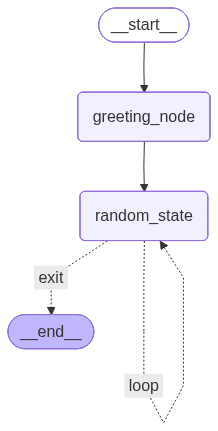

In [27]:
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [29]:
app.invoke({"name":"Sajal","number":[],"counter":-100})

Entering loop 1
Entering loop 2
Entering loop 3
Entering loop 4


{'name': 'Hi there ,Sajal', 'number': [8, 0, 2, 9, 9], 'counter': 5}